In [1]:
import pandas as pd

movies = pd.read_csv("data/imdb_data.csv")
movies.head()

,movie_id,rated,director,actors,plot,country,imdb_rating,imdb_id
0,1,G,John Lasseter,"Tom Hanks, Tim Allen, Don Rickles",A cowboy doll is profoundly jealous when a new...,United States,8.3,tt0114709
1,2,PG,Joe Johnston,"Robin Williams, Kirsten Dunst, Bonnie Hunt",A magic board game summons jungle perils and a...,United States,7.1,tt0113497
2,3,PG-13,Howard Deutch,"Walter Matthau, Jack Lemmon, Ann-Margret",Just as John and Max resolve to save their bel...,United States,6.7,tt0113228
3,4,R,Forest Whitaker,"Whitney Houston, Angela Bassett, Loretta Devine","Based on Terry McMillan's novel, this film fol...",United States,6.0,tt0114885
4,5,PG,Charles Shyer,"Steve Martin, Diane Keaton, Martin Short",George Banks must deal not only with his daugh...,United States,6.1,tt0113041


In [2]:
print(len(movies))

3461


In [3]:
base_movies = pd.read_csv("../stage2_imdb/data/base_movies.csv")
base_movies.head()

,movie_id,title,year
0,1,Toy Story,1995
1,2,Jumanji,1995
2,3,Grumpier Old Men,1995
3,4,Waiting to Exhale,1995
4,5,Father of the Bride Part II,1995


In [4]:
movies = base_movies.merge(movies, how="inner", on="movie_id")
movies

,movie_id,title,year,rated,director,actors,plot,country,imdb_rating,imdb_id
0,1,Toy Story,1995,G,John Lasseter,"Tom Hanks, Tim Allen, Don Rickles",A cowboy doll is profoundly jealous when a new...,United States,8.3,tt0114709
1,2,Jumanji,1995,PG,Joe Johnston,"Robin Williams, Kirsten Dunst, Bonnie Hunt",A magic board game summons jungle perils and a...,United States,7.1,tt0113497
2,3,Grumpier Old Men,1995,PG-13,Howard Deutch,"Walter Matthau, Jack Lemmon, Ann-Margret",Just as John and Max resolve to save their bel...,United States,6.7,tt0113228
3,4,Waiting to Exhale,1995,R,Forest Whitaker,"Whitney Houston, Angela Bassett, Loretta Devine","Based on Terry McMillan's novel, this film fol...",United States,6.0,tt0114885
4,5,Father of the Bride Part II,1995,PG,Charles Shyer,"Steve Martin, Diane Keaton, Martin Short",George Banks must deal not only with his daugh...,United States,6.1,tt0113041
...,...,...,...,...,...,...,...,...,...,...
3456,3948,Meet the Parents,2000,PG-13,Jay Roach,"Ben Stiller, Robert De Niro, Teri Polo",Chicago male nurse and chronic under-achiever ...,United States,7.0,tt0212338
3457,3949,Requiem for a Dream,2000,NC-17,Darren Aronofsky,"Ellen Burstyn, Jared Leto, Jennifer Connelly",The drug-induced utopias of four Coney Island ...,United States,8.3,tt0180093
3458,3950,Tigerland,2000,R,Joel Schumacher,"Colin Farrell, Matthew Davis, Clifton Collins Jr.",A group of recruits go through Advanced Infant...,"Germany, United States",6.9,tt0170691
3459,3951,Two Family House,2000,R,Raymond De Felitta,"Michael Rispoli, Kelly Macdonald, Kathrine Nar...",A dreamer finds that his wife and friends are ...,United States,7.2,tt0202641


In [5]:
print(len(movies))

3461


In [6]:
print(len(movies) == len(movies["movie_id"].unique()))

True


In [7]:
from tabulate import tabulate

df = movies
def columnValues(d):
    row = [d.nunique(), (d == 0).sum(axis=0), d.isna().sum(), round(d.isna().sum() / len(d) * 100, 1), d.dtypes]
    return row

cols = []
for column in df:
    cols.append([column] + columnValues(df[column]))

print(tabulate(cols, headers=['Column', 'Count Unique', 'Count Zeros', 'Count NaNs','% of NaNs', 'data type'], tablefmt='orgtbl'))

| Column      |   Count Unique |   Count Zeros |   Count NaNs |   % of NaNs | data type   |
|-------------+----------------+---------------+--------------+-------------+-------------|
| movie_id    |           3461 |             0 |            0 |         0   | int64       |
| title       |           3424 |             0 |            0 |         0   | object      |
| year        |             81 |             0 |            0 |         0   | int64       |
| rated       |             16 |             0 |          169 |         4.9 | object      |
| director    |           1842 |             0 |           26 |         0.8 | object      |
| actors      |           3411 |             0 |           20 |         0.6 | object      |
| plot        |           3420 |             0 |           39 |         1.1 | object      |
| country     |            363 |             0 |           16 |         0.5 | object      |
| imdb_rating |             68 |             0 |           34 |         1   | fl

In [8]:
movies['rated'].value_counts(dropna=False)

rated
R            1487
PG            542
PG-13         537
Approved      307
NaN           169
G             163
Not Rated     158
Unrated        41
Passed         18
NC-17          16
GP              6
TV-PG           5
TV-MA           5
M/PG            2
TV-G            2
M               2
TV-14           1
Name: count, dtype: int64

Как интерпритировать данные рейтинги

1. Современные MPAA
- G (General Audiences) - Для всех, подходит детям
- PG (Parental Guidance Suggested) - Можно всем, но родителям стоит обратить внимание
- PG-13 (Parents Strongly Cautioned) - Не рекомендуется детям до 13 лет без родителей
- R (Restricted) - До 17 лет только со взрослым сопровождающим
- NC-17 - Только 17+, несовершеннолетним нельзя

2. Старые/исторические метки
- Approved - Фильм “одобрен” по старому Production Code (Hays Code) или ранней системе до современной MPAA. По смыслу это не конкретный возраст, а “прошёл цензуру” тех лет.
- Passed - Тоже “прошёл цензуру/проверку” (часто предшественник/вариант старых обозначений). По смыслу близко к Approved.

3. “Нет рейтинга / неизвестно”
- Not Rated - Рейтинг официально не присвоен (или не найден).
- Unrated - Обычно означает “выпуск без рейтинга” (например, Unrated cut) или просто отсутствие официального рейтинга.
- NaN - Пропуск в данных (OMDb не вернул Rated).

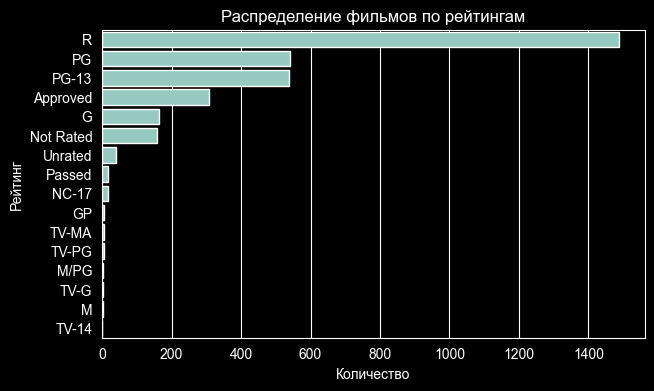

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,4))
sns.countplot(
    data=movies,
    y='rated',
    order=movies['rated'].value_counts().index
)
plt.title('Распределение фильмов по рейтингам')
plt.xlabel('Количество')
plt.ylabel('Рейтинг')
plt.show()

Оставляем только рейтинги MPAA

In [10]:
mpaa = {
    1: "R",
    2: "PG",
    3: "PG-13",
    4: "G",
    5: "NC-17"
}

mpaa_rates = pd.DataFrame({
    "rate_id": mpaa.keys(),
    "rate_name": mpaa.values(),
})

mpaa_rates.to_csv("../mpaa_rates.csv", index=False)
mpaa_rates

,rate_id,rate_name
0,1,R
1,2,PG
2,3,PG-13
3,4,G
4,5,NC-17


In [11]:
def normalize_mpaa(x):
    if pd.isna(x):
        return None

    if x in mpaa.values():
        for rate_id, rate_name in mpaa.items():
            if rate_name == x:
                return rate_id

    return None

In [12]:
movies.loc[:, "rated"] = movies["rated"].apply(normalize_mpaa).astype("Int64")
movies

,movie_id,title,year,rated,director,actors,plot,country,imdb_rating,imdb_id
0,1,Toy Story,1995,4,John Lasseter,"Tom Hanks, Tim Allen, Don Rickles",A cowboy doll is profoundly jealous when a new...,United States,8.3,tt0114709
1,2,Jumanji,1995,2,Joe Johnston,"Robin Williams, Kirsten Dunst, Bonnie Hunt",A magic board game summons jungle perils and a...,United States,7.1,tt0113497
2,3,Grumpier Old Men,1995,3,Howard Deutch,"Walter Matthau, Jack Lemmon, Ann-Margret",Just as John and Max resolve to save their bel...,United States,6.7,tt0113228
3,4,Waiting to Exhale,1995,1,Forest Whitaker,"Whitney Houston, Angela Bassett, Loretta Devine","Based on Terry McMillan's novel, this film fol...",United States,6.0,tt0114885
4,5,Father of the Bride Part II,1995,2,Charles Shyer,"Steve Martin, Diane Keaton, Martin Short",George Banks must deal not only with his daugh...,United States,6.1,tt0113041
...,...,...,...,...,...,...,...,...,...,...
3456,3948,Meet the Parents,2000,3,Jay Roach,"Ben Stiller, Robert De Niro, Teri Polo",Chicago male nurse and chronic under-achiever ...,United States,7.0,tt0212338
3457,3949,Requiem for a Dream,2000,5,Darren Aronofsky,"Ellen Burstyn, Jared Leto, Jennifer Connelly",The drug-induced utopias of four Coney Island ...,United States,8.3,tt0180093
3458,3950,Tigerland,2000,1,Joel Schumacher,"Colin Farrell, Matthew Davis, Clifton Collins Jr.",A group of recruits go through Advanced Infant...,"Germany, United States",6.9,tt0170691
3459,3951,Two Family House,2000,1,Raymond De Felitta,"Michael Rispoli, Kelly Macdonald, Kathrine Nar...",A dreamer finds that his wife and friends are ...,United States,7.2,tt0202641


In [13]:
movies['rated'].value_counts(dropna=False)

rated
1       1487
<NA>     716
2        542
3        537
4        163
5         16
Name: count, dtype: int64

In [14]:
movies['director'].value_counts(dropna=False)

director
Alfred Hitchcock     48
NaN                  26
Woody Allen          20
Spike Lee            14
Steven Spielberg     14
                     ..
Daniel Taplitz        1
Gregor Nicholas       1
David Mirkin          1
Nana Dzhordzhadze     1
Rod Lurie             1
Name: count, Length: 1843, dtype: int64

In [15]:
df[(df["director"].isna())]

,movie_id,title,year,rated,director,actors,plot,country,imdb_rating,imdb_id
45,47,Seven (Se7en),1995,<NA>,NaN,"Tom Wilson, Dana Gould, Brent Butt",NaN,Canada,6.3,tt0346278
63,66,Lawnmower Man 2: Beyond Cyberspace,1996,<NA>,NaN,NaN,NaN,NaN,NaN,tt31915280
360,405,Highlander III: The Sorcerer,1994,<NA>,NaN,NaN,NaN,NaN,NaN,tt33966897
457,506,Orlando,1993,<NA>,NaN,"Felicity Palmer, Rosemary Joshua, Rosa Mannion",NaN,France,NaN,tt0255451
523,576,Fausto,1993,<NA>,NaN,NaN,NaN,Portugal,NaN,tt1653993
945,1073,Willy Wonka and the Chocolate Factory,1971,<NA>,NaN,NaN,NaN,NaN,NaN,tt22690268
1057,1215,Army of Darkness,1993,<NA>,NaN,"Bruce Campbell, Embeth Davidtz, Bridget Fonda",NaN,United States,7.5,tt2651324
1097,1261,Evil Dead II (Dead By Dawn),1987,<NA>,NaN,NaN,NaN,NaN,NaN,tt16160766
1166,1335,Blood Beach,1981,<NA>,NaN,"Patrick O'Riley, Jessica Bayliss, Richard Wells",NaN,NaN,NaN,tt14050190
1248,1430,Underworld,1997,<NA>,NaN,"James Fleet, Susan Wooldridge, Mike Reid",Middle-class teacher William Smith finds his w...,United Kingdom,8.7,tt0163964


У фильмов с неизвестным режиссером сликом много отсутсвующих данных. Такие фильмы стоит удалить

In [16]:
movies = movies[~(movies["director"].isna())]

In [17]:
cols = []
for column in movies:
    cols.append([column] + columnValues(movies[column]))

print(tabulate(cols, headers=['Column', 'Count Unique', 'Count Zeros', 'Count NaNs','% of NaNs', 'data type'], tablefmt='orgtbl'))

| Column      |   Count Unique |   Count Zeros |   Count NaNs |   % of NaNs | data type   |
|-------------+----------------+---------------+--------------+-------------+-------------|
| movie_id    |           3435 |             0 |            0 |         0   | int64       |
| title       |           3398 |             0 |            0 |         0   | object      |
| year        |             81 |             0 |            0 |         0   | int64       |
| rated       |              5 |             0 |          690 |        20.1 | object      |
| director    |           1842 |             0 |            0 |         0   | object      |
| actors      |           3400 |             0 |            5 |         0.1 | object      |
| plot        |           3414 |             0 |           19 |         0.6 | object      |
| country     |            362 |             0 |            0 |         0   | object      |
| imdb_rating |             68 |             0 |           16 |         0.5 | fl

In [18]:
def split_names(s: str):
    if pd.isna(s):
        return []
    parts = [p.strip() for p in str(s).split(",")]
    return [p for p in parts if p]

In [19]:
name_to_id = {}
directors_rows = []
movie_directors_rows = []

next_id = 1

for _, r in movies.iterrows():
    movie_id = int(r["movie_id"])
    directors = split_names(r["director"])

    for name in directors:
        if name not in name_to_id:
            name_to_id[name] = next_id
            directors_rows.append({"director_id": next_id, "director": name})
            next_id += 1

        movie_directors_rows.append({
            "movie_id": movie_id,
            "director_id": name_to_id[name]
        })

directors_df = pd.DataFrame(directors_rows)
movie_directors_df = pd.DataFrame(movie_directors_rows).drop_duplicates()

directors_df.head(), movie_directors_df.head()

(   director_id         director
 0            1    John Lasseter
 1            2     Joe Johnston
 2            3    Howard Deutch
 3            4  Forest Whitaker
 4            5    Charles Shyer,
    movie_id  director_id
 0         1            1
 1         2            2
 2         3            3
 3         4            4
 4         5            5)

In [20]:
directors_df.to_csv("../directors.csv", index=False, encoding="utf-8")
movie_directors_df.to_csv("../movie_directors.csv", index=False, encoding="utf-8")

In [21]:
movies = movies.drop("director", axis=1)
movies

,movie_id,title,year,rated,actors,plot,country,imdb_rating,imdb_id
0,1,Toy Story,1995,4,"Tom Hanks, Tim Allen, Don Rickles",A cowboy doll is profoundly jealous when a new...,United States,8.3,tt0114709
1,2,Jumanji,1995,2,"Robin Williams, Kirsten Dunst, Bonnie Hunt",A magic board game summons jungle perils and a...,United States,7.1,tt0113497
2,3,Grumpier Old Men,1995,3,"Walter Matthau, Jack Lemmon, Ann-Margret",Just as John and Max resolve to save their bel...,United States,6.7,tt0113228
3,4,Waiting to Exhale,1995,1,"Whitney Houston, Angela Bassett, Loretta Devine","Based on Terry McMillan's novel, this film fol...",United States,6.0,tt0114885
4,5,Father of the Bride Part II,1995,2,"Steve Martin, Diane Keaton, Martin Short",George Banks must deal not only with his daugh...,United States,6.1,tt0113041
...,...,...,...,...,...,...,...,...,...
3456,3948,Meet the Parents,2000,3,"Ben Stiller, Robert De Niro, Teri Polo",Chicago male nurse and chronic under-achiever ...,United States,7.0,tt0212338
3457,3949,Requiem for a Dream,2000,5,"Ellen Burstyn, Jared Leto, Jennifer Connelly",The drug-induced utopias of four Coney Island ...,United States,8.3,tt0180093
3458,3950,Tigerland,2000,1,"Colin Farrell, Matthew Davis, Clifton Collins Jr.",A group of recruits go through Advanced Infant...,"Germany, United States",6.9,tt0170691
3459,3951,Two Family House,2000,1,"Michael Rispoli, Kelly Macdonald, Kathrine Nar...",A dreamer finds that his wife and friends are ...,United States,7.2,tt0202641


In [22]:
name_to_id = {}
actors_rows = []
movie_actors_rows = []

next_id = 1

for _, r in movies.iterrows():
    movie_id = int(r["movie_id"])
    actors = split_names(r["actors"])

    for name in actors:
        if name not in name_to_id:
            name_to_id[name] = next_id
            actors_rows.append({"actor_id": next_id, "actor": name})
            next_id += 1

        movie_actors_rows.append({
            "movie_id": movie_id,
            "actor_id": name_to_id[name]
        })

actors_df = pd.DataFrame(actors_rows)
movie_actors_df = pd.DataFrame(movie_actors_rows).drop_duplicates()

actors_df.head(), movie_actors_df.head()

(   actor_id           actor
 0         1       Tom Hanks
 1         2       Tim Allen
 2         3     Don Rickles
 3         4  Robin Williams
 4         5   Kirsten Dunst,
    movie_id  actor_id
 0         1         1
 1         1         2
 2         1         3
 3         2         4
 4         2         5)

In [23]:
actors_df.to_csv("../actors.csv", index=False, encoding="utf-8")
movie_actors_df.to_csv("../movie_actors.csv", index=False, encoding="utf-8")

In [24]:
movies = movies.drop("actors", axis=1)
movies

,movie_id,title,year,rated,plot,country,imdb_rating,imdb_id
0,1,Toy Story,1995,4,A cowboy doll is profoundly jealous when a new...,United States,8.3,tt0114709
1,2,Jumanji,1995,2,A magic board game summons jungle perils and a...,United States,7.1,tt0113497
2,3,Grumpier Old Men,1995,3,Just as John and Max resolve to save their bel...,United States,6.7,tt0113228
3,4,Waiting to Exhale,1995,1,"Based on Terry McMillan's novel, this film fol...",United States,6.0,tt0114885
4,5,Father of the Bride Part II,1995,2,George Banks must deal not only with his daugh...,United States,6.1,tt0113041
...,...,...,...,...,...,...,...,...
3456,3948,Meet the Parents,2000,3,Chicago male nurse and chronic under-achiever ...,United States,7.0,tt0212338
3457,3949,Requiem for a Dream,2000,5,The drug-induced utopias of four Coney Island ...,United States,8.3,tt0180093
3458,3950,Tigerland,2000,1,A group of recruits go through Advanced Infant...,"Germany, United States",6.9,tt0170691
3459,3951,Two Family House,2000,1,A dreamer finds that his wife and friends are ...,United States,7.2,tt0202641


In [25]:
name_to_id = {}
countries_rows = []
movie_countries_rows = []

next_id = 1

for _, r in movies.iterrows():
    movie_id = int(r["movie_id"])
    countries = split_names(r["country"])

    for name in countries:
        if name not in name_to_id:
            name_to_id[name] = next_id
            countries_rows.append({"country_id": next_id, "country": name})
            next_id += 1

        movie_countries_rows.append({
            "movie_id": movie_id,
            "country_id": name_to_id[name]
        })

countries_df = pd.DataFrame(countries_rows)
movie_countries_df = pd.DataFrame(movie_countries_rows).drop_duplicates()

countries_df.head(), movie_countries_df.head()

(   country_id         country
 0           1   United States
 1           2         Germany
 2           3  United Kingdom
 3           4          Russia
 4           5          France,
    movie_id  country_id
 0         1           1
 1         2           1
 2         3           1
 3         4           1
 4         5           1)

In [26]:
countries_df.to_csv("../countries.csv", index=False, encoding="utf-8")
movie_countries_df.to_csv("../movie_countries.csv", index=False, encoding="utf-8")

In [27]:
movies = movies.drop("country", axis=1)
movies

,movie_id,title,year,rated,plot,imdb_rating,imdb_id
0,1,Toy Story,1995,4,A cowboy doll is profoundly jealous when a new...,8.3,tt0114709
1,2,Jumanji,1995,2,A magic board game summons jungle perils and a...,7.1,tt0113497
2,3,Grumpier Old Men,1995,3,Just as John and Max resolve to save their bel...,6.7,tt0113228
3,4,Waiting to Exhale,1995,1,"Based on Terry McMillan's novel, this film fol...",6.0,tt0114885
4,5,Father of the Bride Part II,1995,2,George Banks must deal not only with his daugh...,6.1,tt0113041
...,...,...,...,...,...,...,...
3456,3948,Meet the Parents,2000,3,Chicago male nurse and chronic under-achiever ...,7.0,tt0212338
3457,3949,Requiem for a Dream,2000,5,The drug-induced utopias of four Coney Island ...,8.3,tt0180093
3458,3950,Tigerland,2000,1,A group of recruits go through Advanced Infant...,6.9,tt0170691
3459,3951,Two Family House,2000,1,A dreamer finds that his wife and friends are ...,7.2,tt0202641


In [61]:
movies = movies.drop_duplicates('imdb_id')

In [150]:
tagmovies = pd.read_csv("../ml-32m/movies.csv")
tagmovies_links = pd.read_csv("../ml-32m/links.csv")
tagmovies = tagmovies.merge(tagmovies_links, how="inner", on="movieId")
tagmovies.head()

,movieId,title,genres,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,113497,8844.0
2,3,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,114885,31357.0
4,5,Father of the Bride Part II (1995),Comedy,113041,11862.0


In [151]:
print(len(tagmovies))

87585


In [152]:
movies_imdb_ids = set(
    movies["imdb_id"]
    .dropna()
    .astype(str)
)

movies_imdb_ids

{'tt0090305',
 'tt0120321',
 'tt0202677',
 'tt0073195',
 'tt0067116',
 'tt0118571',
 'tt0120275',
 'tt0102803',
 'tt0087700',
 'tt0120891',
 'tt0089885',
 'tt0101640',
 'tt0208988',
 'tt0092068',
 'tt0107630',
 'tt0066811',
 'tt0029162',
 'tt0115676',
 'tt0104431',
 'tt0039689',
 'tt0120784',
 'tt0114007',
 'tt0113500',
 'tt0095270',
 'tt0064110',
 'tt0080881',
 'tt0107978',
 'tt0047296',
 'tt0138987',
 'tt0104036',
 'tt0119177',
 'tt0081383',
 'tt0162983',
 'tt0088847',
 'tt0110516',
 'tt0032138',
 'tt0115644',
 'tt0045897',
 'tt0048316',
 'tt0134084',
 'tt0113347',
 'tt0085919',
 'tt0109813',
 'tt0108500',
 'tt0079944',
 'tt0118799',
 'tt0097428',
 'tt0085549',
 'tt0195714',
 'tt0108308',
 'tt0106537',
 'tt0110357',
 'tt0113568',
 'tt0115742',
 'tt0042897',
 'tt0164912',
 'tt0091055',
 'tt0112691',
 'tt0118894',
 'tt0114736',
 'tt0108101',
 'tt0117965',
 'tt0109456',
 'tt0118026',
 'tt0116756',
 'tt0043899',
 'tt0120696',
 'tt0080749',
 'tt0110955',
 'tt0084503',
 'tt0120399',
 'tt00

In [153]:
def to_imdb_tt(imdb_id):
    if pd.isna(imdb_id):
        return None
    return f"tt{int(imdb_id):07d}"

tagmovies["imdbId"] = tagmovies["imdbId"].apply(to_imdb_tt)
tagmovies

,movieId,title,genres,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,tt0114709,862.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,tt0113497,8844.0
2,3,Grumpier Old Men (1995),Comedy|Romance,tt0113228,15602.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,tt0114885,31357.0
4,5,Father of the Bride Part II (1995),Comedy,tt0113041,11862.0
...,...,...,...,...,...
87580,292731,The Monroy Affaire (2022),Drama,tt26812510,1032473.0
87581,292737,Shelter in Solitude (2023),Comedy|Drama,tt14907358,986674.0
87582,292753,Orca (2023),Drama,tt12388280,948139.0
87583,292755,The Angry Breed (1968),Drama,tt0064027,182776.0


In [154]:
tagmovies = tagmovies[
    tagmovies["imdbId"].isin(movies_imdb_ids)
].copy()
tagmovies

,movieId,title,genres,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,tt0114709,862.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,tt0113497,8844.0
2,3,Grumpier Old Men (1995),Comedy|Romance,tt0113228,15602.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,tt0114885,31357.0
4,5,Father of the Bride Part II (1995),Comedy,tt0113041,11862.0
...,...,...,...,...,...
31001,137124,The Boat Is Full (1981),Drama|War,tt0082095,42140.0
53364,185913,Shadows in the Storm (1988),(no genres listed),tt0096084,219843.0
54293,187811,Killer Looks (1994),Thriller,tt0110261,239406.0
62086,204624,The Return of Godzilla (1984),Action|Sci-Fi,tt9015178,421467.0


In [155]:
tagmovies = tagmovies[["movieId", "imdbId"]]
tagmovies

,movieId,imdbId
0,1,tt0114709
1,2,tt0113497
2,3,tt0113228
3,4,tt0114885
4,5,tt0113041
...,...,...
31001,137124,tt0082095
53364,185913,tt0096084
54293,187811,tt0110261
62086,204624,tt9015178


In [156]:
movie_tag = pd.read_csv("../ml-32m/tags.csv")
movie_tag

,userId,movieId,tag,timestamp
0,22,26479,Kevin Kline,1583038886
1,22,79592,misogyny,1581476297
2,22,247150,acrophobia,1622483469
3,34,2174,music,1249808064
4,34,2174,weird,1249808102
...,...,...,...,...
2000067,162279,90645,Rafe Spall,1320817734
2000068,162279,91079,Anton Yelchin,1322337407
2000069,162279,91079,Felicity Jones,1322337400
2000070,162279,91658,Rooney Mara,1325828398


In [157]:
movie_tag = movie_tag.merge(tagmovies, how="inner", on="movieId")[["imdbId", "tag"]]
movie_tag

,imdbId,tag
0,tt0094721,music
1,tt0094721,weird
2,tt0076759,sci-fi
3,tt0076759,space
4,tt0114814,clever
...,...,...
451418,tt0181875,Frances McDormand
451419,tt0181875,Patrick Fugit
451420,tt0181875,Philip Seymour Hoffman
451421,tt0181875,Zooey Deschanel


In [158]:
movie_tag.isna().sum()

imdbId    0
tag       4
dtype: int64

In [159]:
movie_tag = movie_tag[movie_tag["tag"].notna()]
movie_tag.isna().sum()

imdbId    0
tag       0
dtype: int64

In [160]:
import re
import unicodedata

def normalize_tag(s: str) -> str | None:
    if pd.isna(s):
        return None

    s = str(s).strip()

    if s == "":
        return None

    s = unicodedata.normalize("NFKD", s)
    s = re.sub(r"[^a-zA-Z0-9 ]+", "", s)
    s = re.sub(r"\s+", " ", s)
    s = s.lower().strip()
    if not re.search(r"[a-z]", s):
        return None

    return s if s != "" else None

In [161]:
print(len(movie_tag))

451419


In [163]:
movie_tag.loc[:, 'tag'] = movie_tag['tag'].apply(normalize_tag)
movie_tag

,imdbId,tag
0,tt0094721,music
1,tt0094721,weird
2,tt0076759,scifi
3,tt0076759,space
4,tt0114814,clever
...,...,...
451418,tt0181875,frances mcdormand
451419,tt0181875,patrick fugit
451420,tt0181875,philip seymour hoffman
451421,tt0181875,zooey deschanel


In [164]:
movie_tag = movie_tag[
    movie_tag["tag"].notna() &
    (movie_tag["tag"].astype(str).str.strip() != "")]
movie_tag

,imdbId,tag
0,tt0094721,music
1,tt0094721,weird
2,tt0076759,scifi
3,tt0076759,space
4,tt0114814,clever
...,...,...
451418,tt0181875,frances mcdormand
451419,tt0181875,patrick fugit
451420,tt0181875,philip seymour hoffman
451421,tt0181875,zooey deschanel


In [165]:
print(len(movie_tag))

450912


In [166]:
tags = movie_tag["tag"].drop_duplicates()
tags = tags.dropna().drop_duplicates()
tags = tags.sort_values().reset_index(drop=True)
tags

0                       0 stars
1                    007 series
2                   10 year old
3              10 year old girl
4                10 years later
                  ...          
48070                 zoophilia
48071                     zorro
48072    zucker abrahams zucker
48073           zucker brothers
48074              zuzus petals
Name: tag, Length: 48075, dtype: object

In [167]:
tags = pd.DataFrame({
    "tag_id": range(1, len(tags) + 1),
    "tag_name": tags,
})
tags.to_csv("../tags.csv", index=False, encoding="utf-8")

In [170]:
movie_tag_copy = (movie_tag.merge(movies[['movie_id', 'imdb_id']], how='inner', left_on='imdbId', right_on='imdb_id')
                  .merge(tags, how='right', left_on='tag', right_on='tag_name'))[['movie_id', 'tag_id']].sort_values("movie_id").reset_index(drop=True)
movie_tag_copy

,movie_id,tag_id
0,1,46846
1,1,7754
2,1,13114
3,1,7754
4,1,1820
...,...,...
450907,3952,31559
450908,3952,16781
450909,3952,16781
450910,3952,31559


In [171]:
movie_tag_copy.to_csv("../movie_tag.csv", index=False, encoding="utf-8")

In [172]:
movies.to_csv("../movies.csv", index=False, encoding="utf-8")